In [10]:
import pandas as pd

table = pd.read_csv("./manutencao_preditiva.csv")
table

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [11]:
table[['temp_ar_norm', 'temp_pr_norm']] = (table[['Temperatura Ar [K]', 'Temperatura Processo [K]']] - table[['Temperatura Ar [K]', 'Temperatura Processo [K]']].min()) / (table[['Temperatura Ar [K]', 'Temperatura Processo [K]']].max() - table[['Temperatura Ar [K]', 'Temperatura Processo [K]']].min())
table[['Temperatura Processo [K]','Temperatura Ar [K]','temp_ar_norm', 'temp_pr_norm']]

,Temperatura Processo [K],Temperatura Ar [K],temp_ar_norm,temp_pr_norm
0,308.6,298.1,0.304348,0.358025
1,308.7,298.2,0.315217,0.370370
2,308.5,298.1,0.304348,0.345679
3,308.6,298.2,0.315217,0.358025
4,308.7,298.2,0.315217,0.370370
...,...,...,...,...
9995,308.4,298.8,0.380435,0.333333
9996,308.4,298.9,0.391304,0.333333
9997,308.6,299.0,0.402174,0.358025
9998,308.7,299.0,0.402174,0.370370


In [ ]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


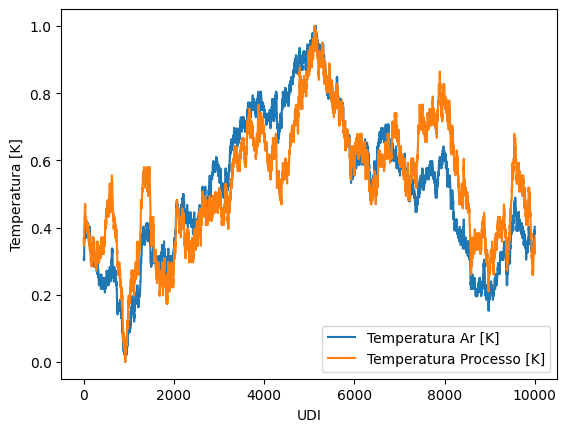

In [ ]:
from matplotlib import pyplot as plt

x = table["UDI"]
y1 = table["temp_ar_norm"]
y2 = table["temp_pr_norm"]

plt.plot(x, y1, label="Temperatura Ar [K]")
plt.plot(x, y2, label="Temperatura Processo [K]")
plt.xlabel("UDI")
plt.ylabel("Temperatura [K]")
plt.legend()
plt.show()

In [12]:
table['Tipo da Falha'].value_counts()

Tipo da Falha
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [18]:
table['tipo_falha_norm'] = table['Tipo da Falha'].astype('category').cat.codes
table['tipo_falha_norm'].value_counts() 

tipo_falha_norm
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

In [13]:
table['Tipo'].value_counts()

Tipo
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [17]:
table['tipo_norm'] = table['Tipo'].astype('category').cat.codes
table['tipo_norm'].value_counts()

tipo_norm
1    6000
2    2997
0    1003
Name: count, dtype: int64